In [1]:
import pandas as pd

#importing own scripts
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'scripts'))
import own_scripts

#reading raw data
df = pd.read_json(path_or_buf='../data/cocktail_dataset.json')

# Preprocessing

In [2]:
# preprocessing of dataset as in previous our analyses
df, ingredients = own_scripts.dataset_preprocessing(df)
ingredients_names = own_scripts.ingredients_to_names(ingredients, df['ingredientsID'])

# updating and renaming column
df['ingredientsID'] = ingredients_names
df.rename(columns={'ingredientsID': 'ingredients'}, inplace=True)

# Dividing into clusters by ingredients list
We divide our list of cocktails to clusters by counting similarity between used ingredients.

In [3]:
df['cluster'] = own_scripts.clusterization(df, clusters=5)
df.head()

C:\Users\01sok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id,name,category,glass,instructions,ingredients,cluster
0,11000,Mojito,Cocktail,Highball glass,Muddle mint leaves with sugar and lime juice. ...,"Soda water, Light Rum, Lime, Mint, Sugar",4
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,Place sugar cube in old fashioned glass and sa...,"Water, Sugar, Angostura Bitters, Bourbon",0
2,11002,Long Island Tea,Ordinary Drink,Highball glass,Combine all ingredients (except cola) and pour...,"Light Rum, lemon, Vodka, Gin, Tequila, Coca-Cola",4
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"Stir into glass over ice, garnish and serve.","Sweet Vermouth, Gin, Campari",2
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"Shake with ice. Strain into chilled glass, gar...","Powdered Sugar, lemon, Blended Whiskey, Cherry",0


## Ploting clustered data

# Recommending similar cocktails

In [4]:
# specify base cocktail
similar_to = 'Loch Lomond'


#-------------------------------------------------
own_scripts.print_similar_cocktails(df, similar_to)

Your cocktail:


,id,name,category,glass,instructions,ingredients,cluster
108,11658,Loch Lomond,Ordinary Drink,Cocktail glass,"In a mixing glass half-filled with ice cubes, ...","Scotch, Drambuie, Dry Vermouth, Lemon Peel",2


Suggested coctails (most similar at the top):


,id,name,category,glass,instructions,ingredients,cluster
0,11324,Dry Rob Roy,Ordinary Drink,Cocktail glass,"In a mixing glass half-filled with ice cubes, ...","Scotch, Dry Vermouth, Lemon Peel",2
1,11121,Bobby Burns Cocktail,Ordinary Drink,Cocktail glass,Stir all ingredients (except lemon peel) with ...,"Scotch, Benedictine, Lemon Peel, Sweet Vermouth",2
2,11021,Allegheny,Ordinary Drink,Cocktail glass,Shake all ingredients (except lemon peel) with...,"Blackberry Brandy, Bourbon, Dry Vermouth, Lemo...",2


#### Observation: In most of the suggestions clusters are the same as in the original drink.

C:\Users\01sok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


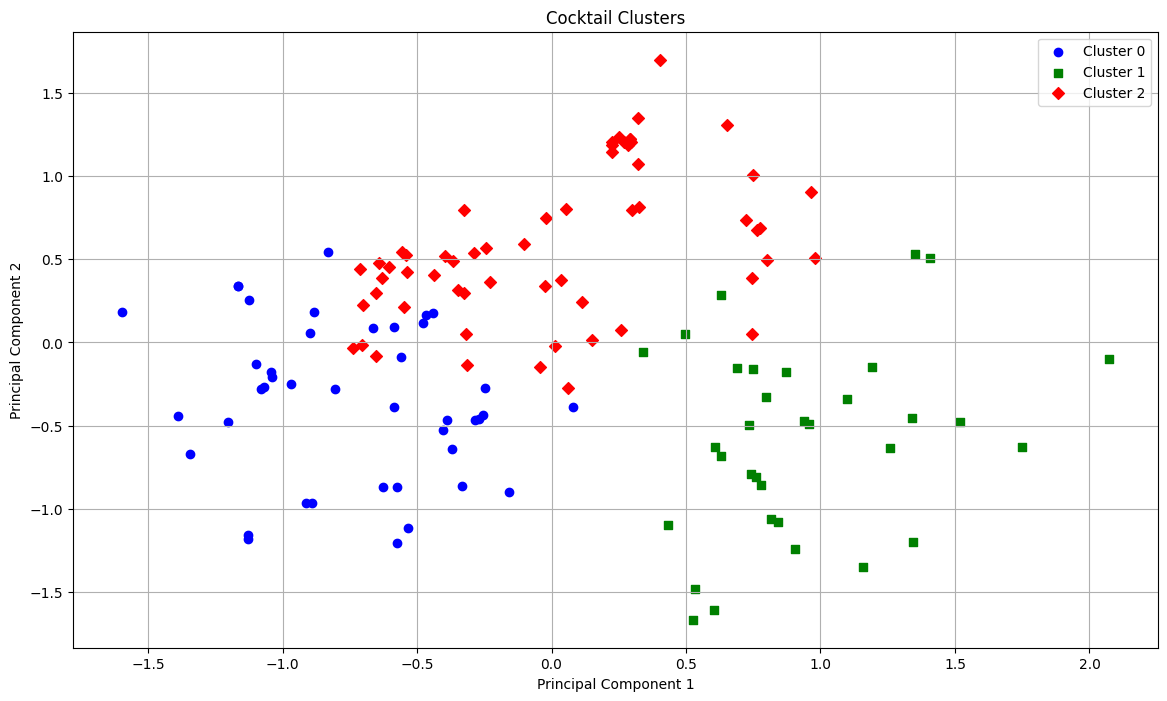

In [9]:
ax = own_scripts.plot_cocktail_clusters(df, n_clusters=3, print_labels=False)
own_scripts.plt.show()